In [1]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

## libraries for ANN

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential


import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
## warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
## load my dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df['creatinine_phosphokinase'].value_counts()

creatinine_phosphokinase
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: count, Length: 208, dtype: int64

In [6]:
# check for nulls
# code seaborn
# clean data

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


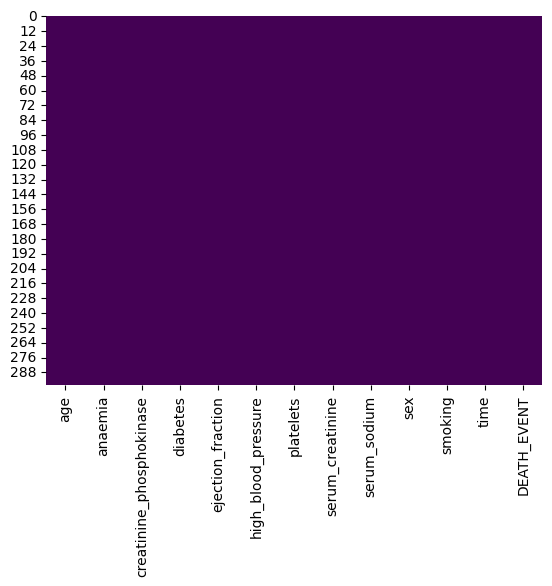

In [8]:
# # check for nulls
# df.isnull().sum()
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()

# EDA

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Distribution charts

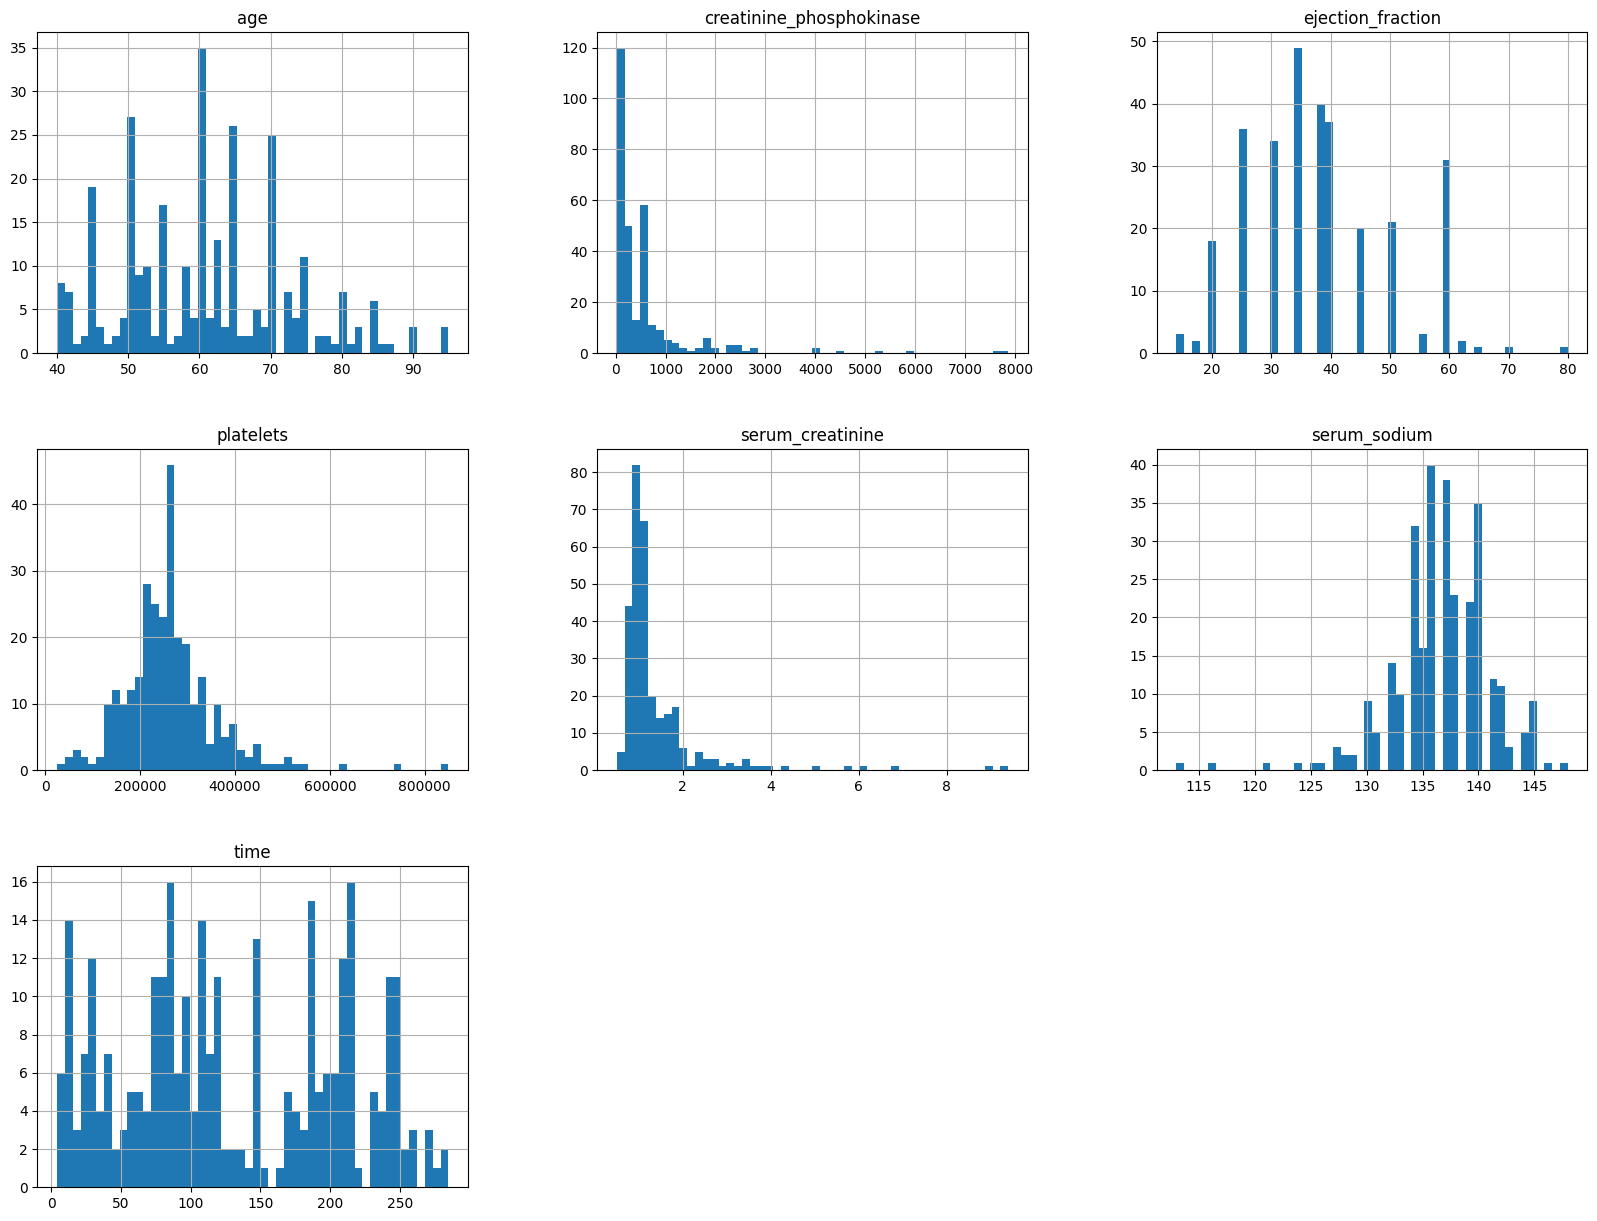

In [10]:
import matplotlib.pyplot as plt

# Specify the columns you want to create histograms for
columns_to_plot = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Create histograms for the selected columns
df[columns_to_plot].hist(bins=50, figsize=(20, 15))
plt.show()




Bar charts

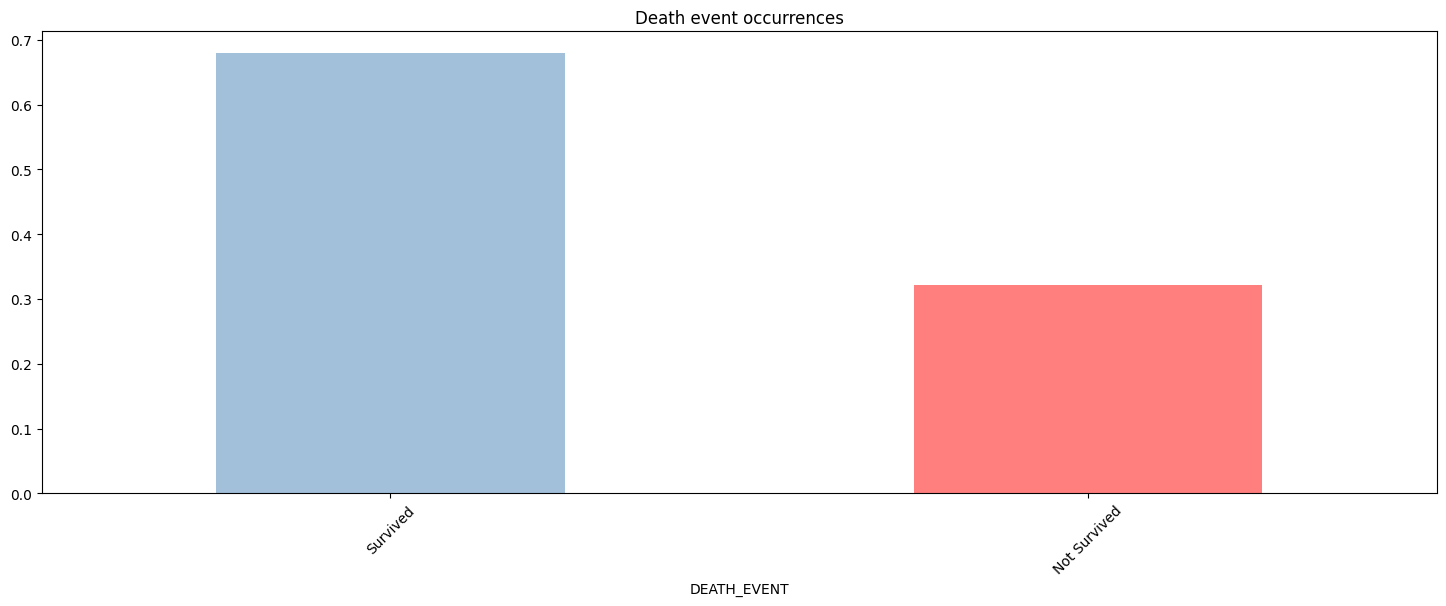

In [11]:
fig =plt.figure(figsize=(18,6))

df.DEATH_EVENT.value_counts(normalize = True).plot(kind="bar", alpha =0.5, color = ["steelblue", "red"])

# Change the title of the items on the x-axis
plt.xticks([0, 1], ["Survived", "Not Survived"], rotation =45)
plt.title("Death event occurrences")

plt.grid(False)
plt.show()

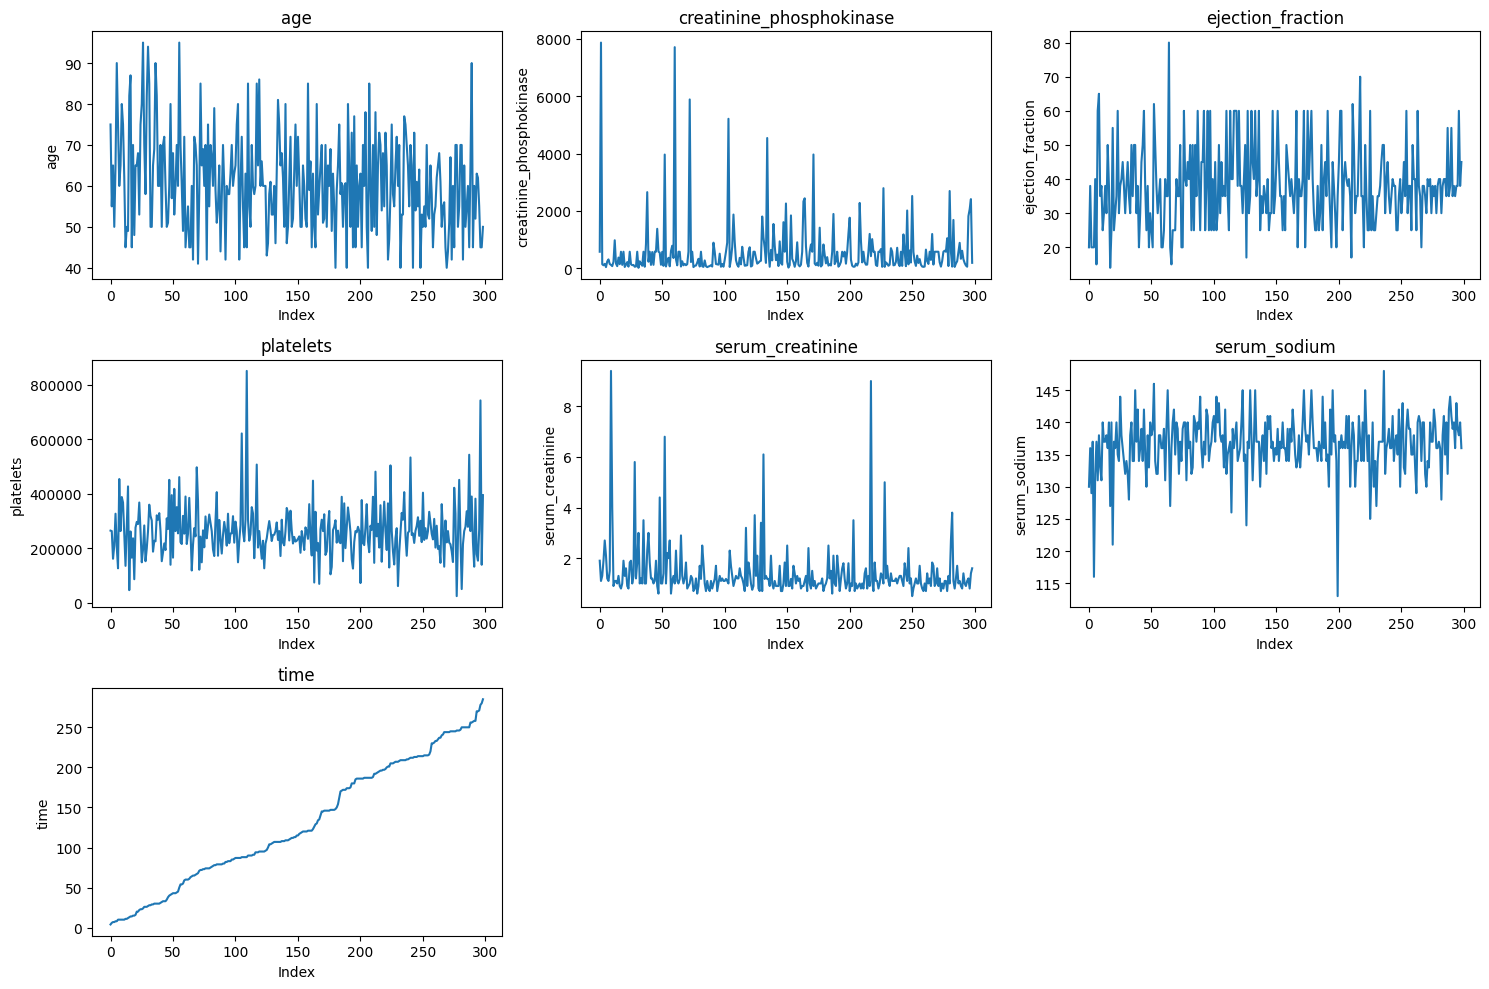

In [12]:
# Define the columns you want to create line charts for
columns_to_plot = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Define the number of rows and columns for subplots
num_rows = 3  # You can adjust this based on the number of columns you want to display
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Plot each column in a separate subplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.plot(df.index, df[column])
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel(column)

# Remove any empty subplots if the number of columns is less than num_rows * num_cols
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'age'),
  Text(1, 0, 'anaemia'),
  Text(2, 0, 'creatinine_phosphokinase'),
  Text(3, 0, 'diabetes'),
  Text(4, 0, 'ejection_fraction'),
  Text(5, 0, 'high_blood_pressure'),
  Text(6, 0, 'platelets'),
  Text(7, 0, 'serum_creatinine'),
  Text(8, 0, 'serum_sodium'),
  Text(9, 0, 'sex'),
  Text(10, 0, 'smoking'),
  Text(11, 0, 'time'),
  Text(12, 0, 'DEATH_EVENT')])

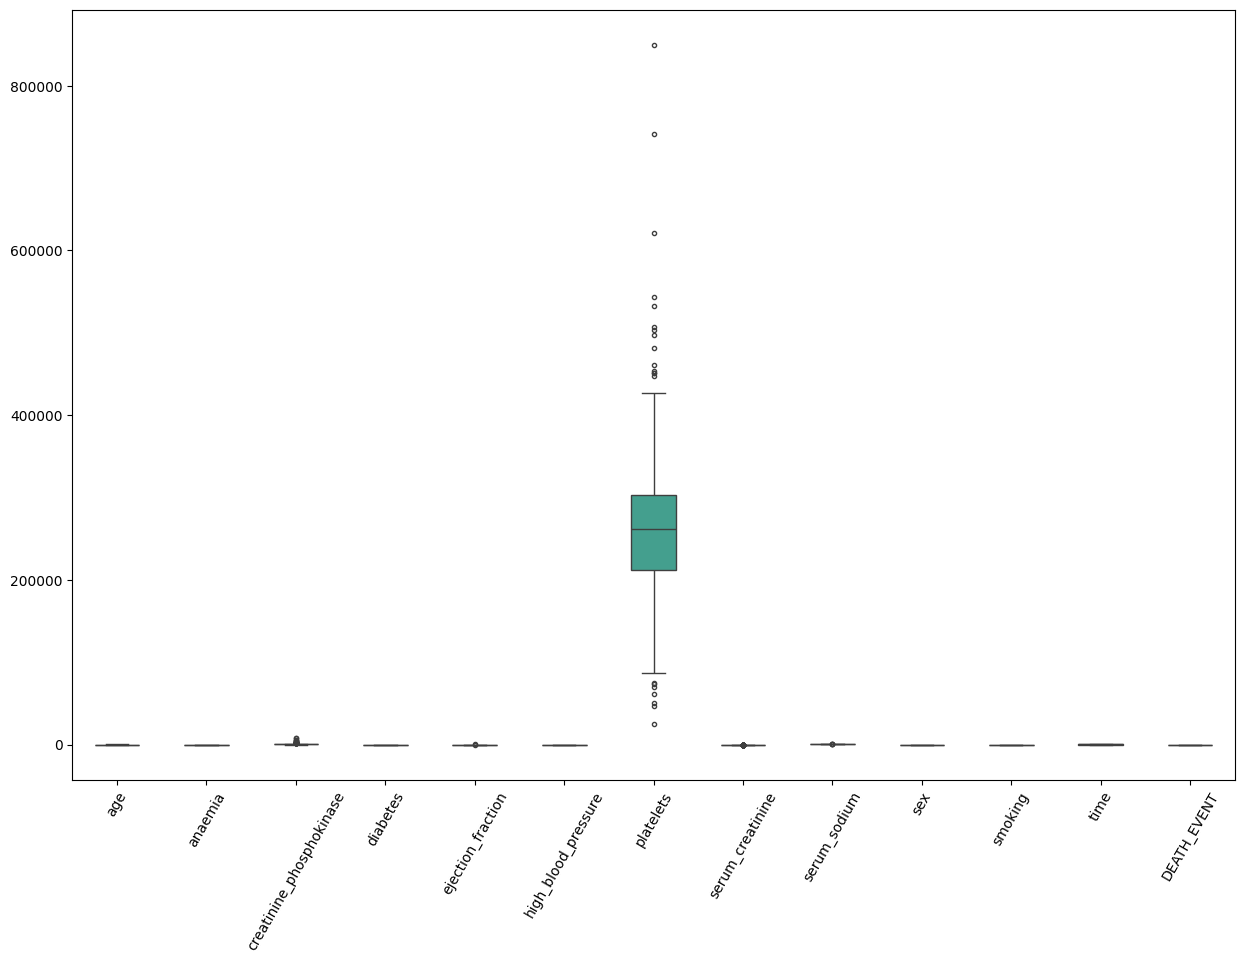

In [13]:
fig, ax = plt.subplots( figsize = (15,10))
sns.boxplot (data =df, width = 0.5, ax = ax, fliersize= 3)
plt.xticks (rotation = 60)

In [14]:
# # remove the outliers
# def extract_whiskers(data):
#     median_value = np.median(data)
#     upper_quartile = np.percentile (data, 75)
#     lower_quartile = np.percentile (data, 25)

#     iqr = upper_quartile - lower_quartile

#     print ("Upper whisker:", data [data <= upper_quartile +1.5* iqr] * max())
#     print ("Lower whisker:", data [data >= upper_quartile -1.5* iqr] * min())


In [15]:
# correl matrix
correl_mat= df.corr(numeric_only= True) # no need to do iloc and select columns
correl_mat
# neg correl means weak linear relati betwee 2 variable. increase in one ==> other tend to decrease


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [16]:
# correl vs target 
df.corr()["DEATH_EVENT"].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

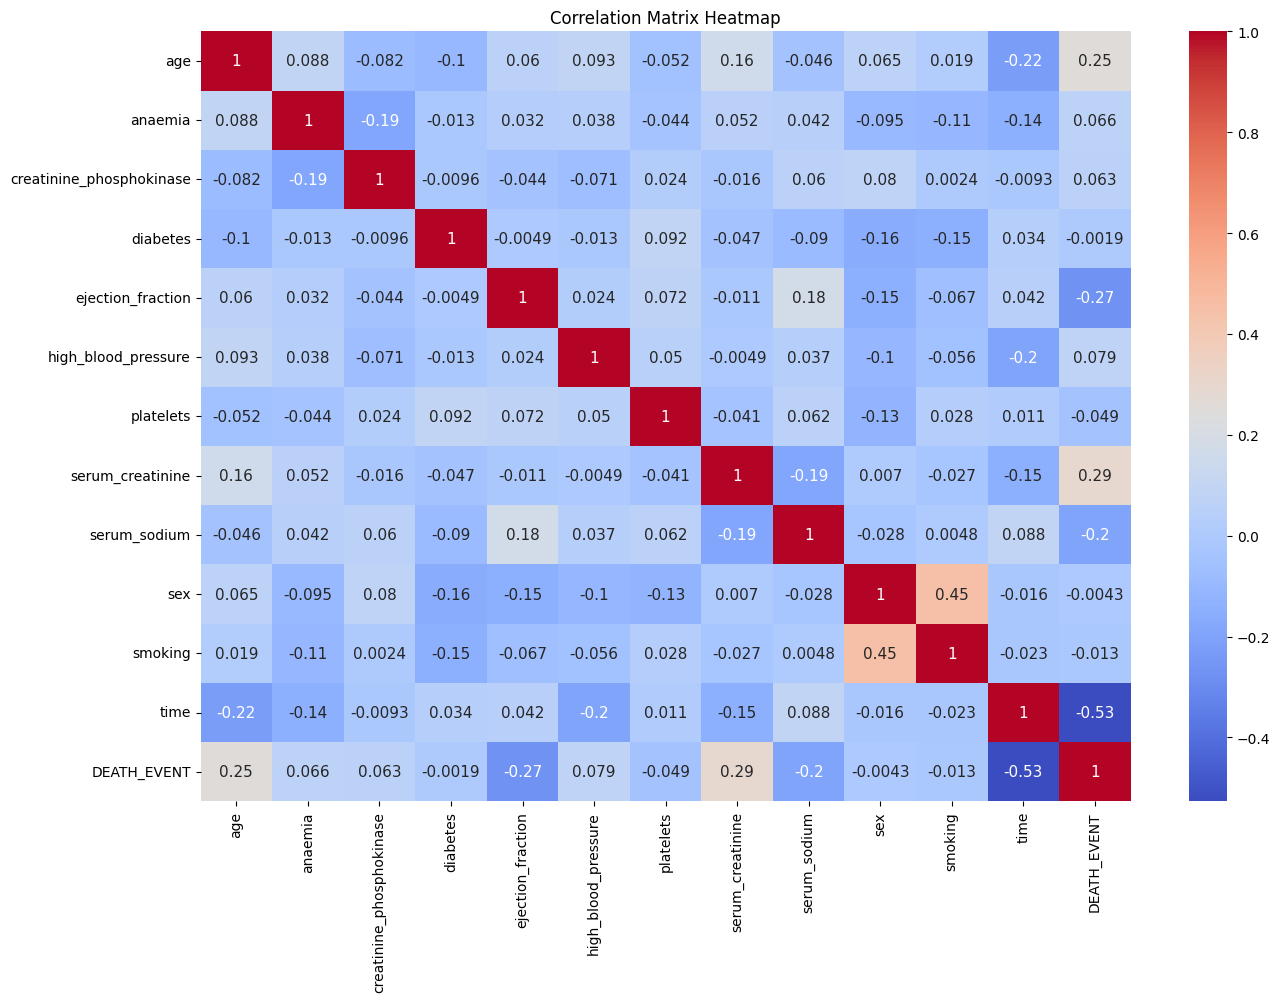

In [17]:
plt.figure(figsize=(15,10)) #to increase the size of the figure
sns.heatmap(correl_mat, cmap = 'coolwarm', annot=True, annot_kws={'size': 11})
plt.title("Correlation Matrix Heatmap", loc="center")

In [18]:
# sns.pairplot(data=df, hue='DEATH_EVENT')
# plt.show()

# Models
Artificial Neural Networks (ANN)

In [19]:
# create features and target
X = df.iloc[:,0:-1].values # features
y = df.iloc[:, -1].values  # target

# scale the data
sc = StandardScaler()
x = sc.fit_transform(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=12)

In [20]:
X_train

array([[ 55.,   0., 572., ...,   0.,   0., 215.],
       [ 54.,   1., 427., ...,   0.,   0., 196.],
       [ 85.,   0.,  23., ...,   1.,   0.,  28.],
       ...,
       [ 65.,   0., 582., ...,   1.,   1., 212.],
       [ 70.,   0.,  88., ...,   0.,   0., 215.],
       [ 60.,   1., 231., ...,   1.,   0., 120.]])

In [21]:
model = keras.Sequential(
    [
      #  keras.layers.Flatten()
      keras.layers.Dense(units=16, activation=tf.keras.activations.relu, input_dim=12, name='Input_Layer'),
      keras.layers.Dense(units=8, activation=tf.keras.activations.relu, name='Hidden_Layer_1'),
      keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid, name='Output_Layer')
    ]
)

In [22]:

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 16)                208       
                                                                 
 Hidden_Layer_1 (Dense)      (None, 8)                 136       
                                                                 
 Output_Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [24]:
hist = model.fit(X_train,y_train, epochs =100,validation_data=(X_test, y_test))

Epoch 1/100


8/8 [==============================] - 1s 42ms/step - loss: 7719.6772 - accuracy: 0.6862 - val_loss: 6148.1353 - val_accuracy: 0.6500
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 6172.3618 - accuracy: 0.6862 - val_loss: 4723.3384 - val_accuracy: 0.6500
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 4579.2383 - accuracy: 0.6862 - val_loss: 3397.9421 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 3135.3911 - accuracy: 0.6862 - val_loss: 2118.5583 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 1756.5522 - accuracy: 0.6862 - val_loss: 894.7428 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 558.4722 - accuracy: 0.6569 - val_loss: 389.4667 - val_accuracy: 0.3500
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 324.8315 - accuracy: 0.3849 - val_loss: 131.7652 - val_accuracy: 0.6500
E

In [25]:
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

8/8 [==============================] - 0s 2ms/step - loss: 7.1476 - accuracy: 0.7071
Training Accuracy: 70.71%

2/2 [==============================] - 0s 5ms/step - loss: 4.6866 - accuracy: 0.7167
Testing Accuracy: 71.67%



In [26]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 3ms/step


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[39  0]
 [17  4]]


0.7166666666666667

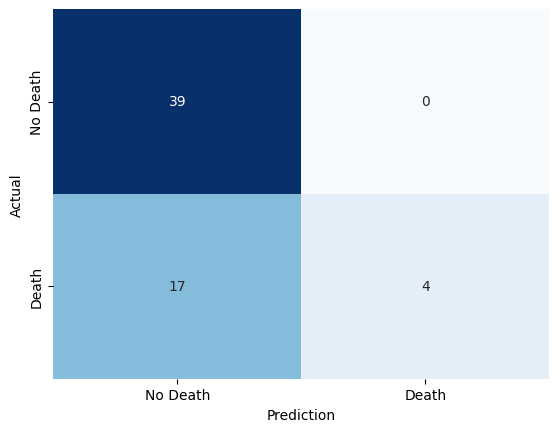

In [28]:
ax = sns.heatmap(cm, annot=True, xticklabels=["No Death",'Death'], yticklabels=['No Death','Death'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [29]:
acc = hist.history['accuracy']
loss = hist.history['loss']

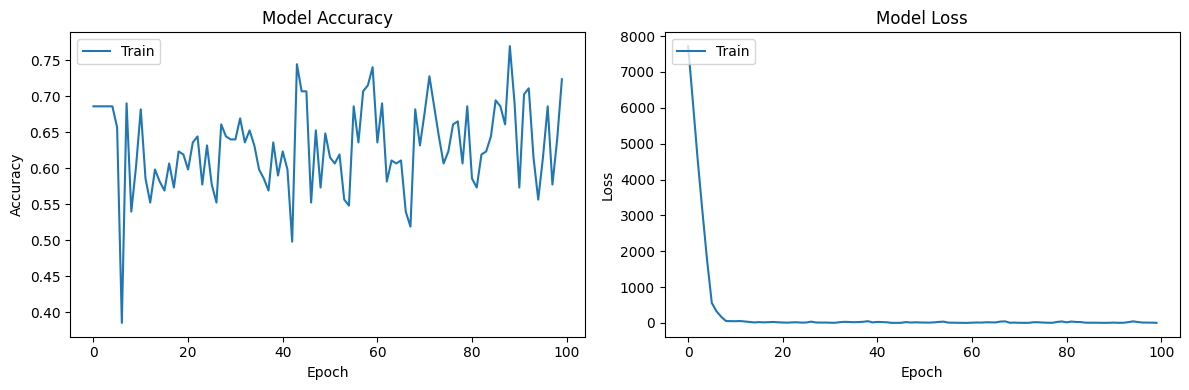

In [30]:
from matplotlib import pyplot as plt

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first chart in the first subplot (1x2, subplot 1)
axes[0].plot(hist.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train'], loc='upper left')

# Plot the second chart in the second subplot (1x2, subplot 2)
axes[1].plot(hist.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'], loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the combined canvas with both charts
plt.show()


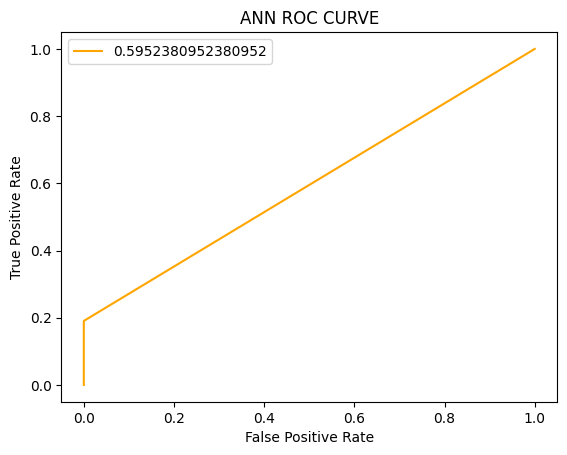

In [32]:
auc_ann = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color = 'orange', label = auc_ann)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC CURVE')
plt.legend()
plt.show()

# Classfication models

Logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X = df.iloc[:, 0:-1].values  # Features
y = df.iloc[:, -1].values  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Scale the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Create a logistic regression model
log_model = LogisticRegression(random_state=0, max_iter=1000)

# Fit the model
log_model.fit(scaled_X_train, y_train)


LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
# Make predictions on the test data
y_pred = log_model.predict(X_test)

# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, y_pred),4)
print("Logistic Regression1 Accuracy:", accuracy)

Logistic Regression1 Accuracy: 0.6833


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



In [ ]:
# PERFORMANCE METRICS
# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, y_pred), 4)
print("Logistic Regression Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print("Accuracy from confusion matrix:", accuracy_from_confusion)

Logistic Regression Accuracy: 0.6833
Confusion Matrix:
[[41  0]
 [19  0]]
Accuracy from confusion matrix: 0.6833


In [ ]:
# we need to assess how y_test and predictions look 
train =pd.DataFrame({"actual target y_test": y_test.flatten(), "Predictions": np.round(y_pred.flatten(),2)})

# train['Difference'] = round((train['actual target y_test'] - train['Predictions']))

# Print the updated DataFrame
print(train)

    actual target y_test  Predictions
0                      0            0
1                      0            0
2                      0            0
3                      1            0
4                      0            0
5                      0            0
6                      0            0
7                      0            0
8                      0            0
9                      0            0
10                     0            0
11                     0            0
12                     1            0
13                     1            0
14                     0            0
15                     0            0
16                     0            0
17                     0            0
18                     0            0
19                     1            0
20                     1            0
21                     1            0
22                     0            0
23                     0            0
24                     0            0
25          

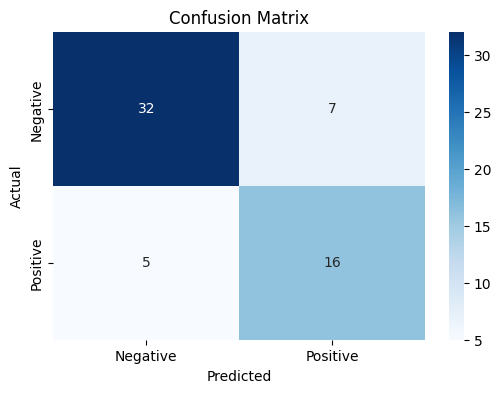

In [ ]:
class_names = ["Negative", "Positive"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
X = df.iloc[:,0:-1].values # features
y = df.iloc[:, -1].values  # target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Create a K-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),4)
print("KNN Accuracy:", accuracy)
print()
print(classification_report(y_pred, y_test))

KNN Accuracy: 0.7833

              precision    recall  f1-score   support

           0       0.98      0.77      0.86        52
           1       0.37      0.88      0.52         8

    accuracy                           0.78        60
   macro avg       0.67      0.82      0.69        60
weighted avg       0.89      0.78      0.81        60



Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets for the random forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=32)

# Create an instance of the RandomForestClassifier
random_forest = RandomForestClassifier()

# Fit the random forest model on the training data
random_forest.fit(X_train_rf, y_train_rf)

# Predict using the random forest model
y_pred_rf = random_forest.predict(X_test_rf)

accuracy = round(accuracy_score(y_pred_rf, y_test_rf),4)
print("Random Forest:", accuracy)
print()
print(classification_report(y_pred_rf, y_test_rf))

Random Forest: 0.8833

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.84      0.80      0.82        20

    accuracy                           0.88        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60



SVM

In [ ]:
from sklearn import metrics
# SVM
# Prepare the data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
X = df.iloc[:,0:-1].values # features
y = df.iloc[:, -1].values  # target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

#Create a SVM Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_model.predict(X_test)

#Calculate the accuracy of our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_pred, y_test))

Accuracy: 0.8166666666666667

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.68      0.72      0.70        18

    accuracy                           0.82        60
   macro avg       0.78      0.79      0.79        60
weighted avg       0.82      0.82      0.82        60



Decision Tree

                     Feature  Importance
11                      time    0.521923
4          ejection_fraction    0.094008
2   creatinine_phosphokinase    0.089653
7           serum_creatinine    0.088280
6                  platelets    0.053793
8               serum_sodium    0.051604
0                        age    0.046655
1                    anaemia    0.021918
5        high_blood_pressure    0.019380
3                   diabetes    0.012786
9                        sex    0.000000
10                   smoking    0.000000


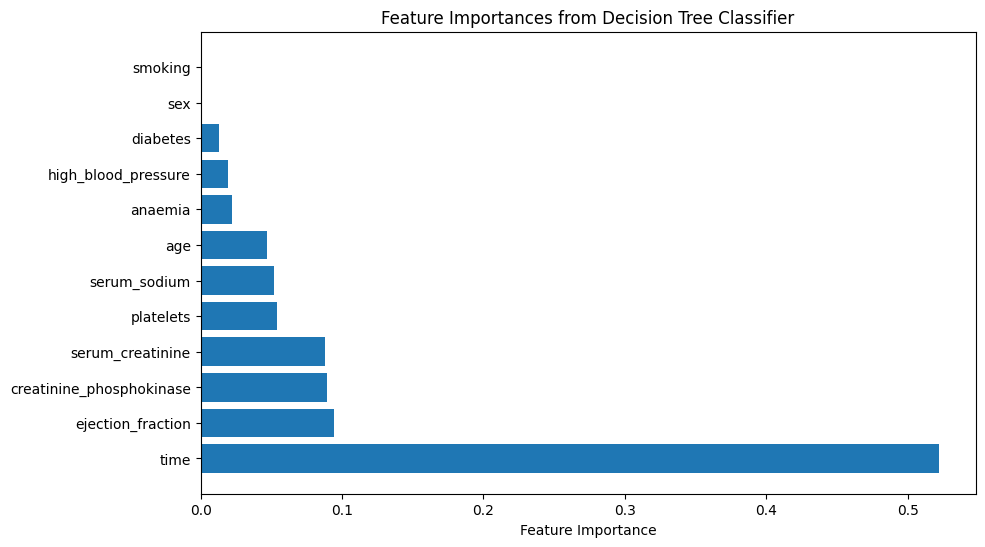

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
# visualize features
# Assuming you have already split your data and trained the model


# First let's split the data into dependant and indep variables for the train and test datasets
# Train features
X_train = df.drop(['DEATH_EVENT'], axis=1)
y_train = df['DEATH_EVENT']

# Initialize the model
model = DecisionTreeClassifier()

# Fit the model to your data
model.fit(X_train, y_train)

# Access feature importances
feature_importances = model.feature_importances_

# Create a pandas DataFrame to display the feature importances with their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(importance_df)

# If you want to create a bar plot to visualize the feature importances:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Decision Tree Classifier')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the dataset into features (X) and target (y)
X = df.iloc[:, 0:-1].values  # Features
y = df.iloc[:, -1].values   # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, y_pred), 4)
print("Decision Tree Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test), 4)
print("Accuracy from confusion matrix:", accuracy_from_confusion)

# Create default Decision Tree classifer object
decisionTree_model_gini = DecisionTreeClassifier()

# Use entropy criterion
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

# Use max depth of 3
decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)

# Fit the trees
decisionTree_model_gini.fit(X_train,y_train)
decisionTree_model_entropy.fit(X_train,y_train)
decisionTree_model_depth3.fit(X_train,y_train)

# Make prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth3.predict(X_test)

print("Accuracy (gini):",metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (entropy):",metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy (depth3):",metrics.accuracy_score(y_test, y_pred_depth3))



Decision Tree Accuracy: 0.6333
Confusion Matrix:
[[27  8]
 [14 11]]
Accuracy from confusion matrix: 0.6333
Accuracy (gini): 0.65
Accuracy (entropy): 0.7
Accuracy (depth3): 0.6833333333333333
